In [1]:
import pandas as pd
import numpy as np
import itertools
import math
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

from g4l.data import Sample
import g4l.display

from g4l.estimators.ctm import CTM
from g4l.estimators.prune import Prune
from g4l.estimators.ctm_scanner import CTMScanner
import g4l.tree.generation as gen
import g4l.tree as tree


#cache_dir = '../example1/cache'

In [2]:
max_depth = 4

In [3]:
# Create a sample object instance
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])
t = tree.ContextTree(X, max_depth=4, tree_initialization_method=gen.incremental)

../../g4l/tree/generation/incremental.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['prev'] = nodes.node.str.slice(stop=-1)


In [4]:
prune_obj = Prune(t)
prune_obj.execute()
prune_obj.results

[1, 148, -76845.38803567209]
[2, 147, -76845.42645699375]
[3, 145, -76845.48125424856]
[4, 143, -76845.54009956575]
[5, 142, -76845.71554220919]
[6, 141, -76845.90513391363]
[7, 140, -76846.1066332162]
[8, 139, -76846.35780441805]
[9, 138, -76846.7202675742]
[10, 136, -76847.2337010917]
[11, 135, -76847.75694923548]
[12, 132, -76848.30166467903]
[13, 131, -76848.32295356838]
[14, 131, -76848.32295356838]
[15, 131, -76848.32295356838]
[16, 129, -76849.1831519171]
[17, 128, -76850.05395182062]
[18, 126, -76850.97707865702]
[19, 124, -76851.10916672116]
[20, 124, -76851.10916672116]
[21, 124, -76851.10916672116]
[22, 124, -76851.10916672116]
[23, 123, -76852.12381292021]
[24, 122, -76853.25635030384]
[25, 120, -76854.47297733236]
[26, 119, -76855.7753292733]
[27, 117, -76857.16909811753]
[28, 116, -76858.62461394769]
[29, 114, -76858.86600281384]
[30, 114, -76858.86600281384]
[31, 114, -76858.86600281384]
[32, 114, -76858.86600281384]
[33, 113, -76860.3824345443]
[34, 110, -76862.22588034

,iter_num,num_nodes,log_likelihood_sum
0,1.0,148.0,-76845.388036
1,2.0,147.0,-76845.426457
2,3.0,145.0,-76845.481254
3,4.0,143.0,-76845.540100
4,5.0,142.0,-76845.715542
...,...,...,...
170,171.0,8.0,-81642.693546
171,172.0,8.0,-81642.693546
172,173.0,8.0,-81642.693546
173,174.0,8.0,-81642.693546


In [5]:
df_results = prune_obj.results
df_results

,iter_num,num_nodes,log_likelihood_sum
0,1.0,148.0,-76845.388036
1,2.0,147.0,-76845.426457
2,3.0,145.0,-76845.481254
3,4.0,143.0,-76845.540100
4,5.0,142.0,-76845.715542
...,...,...,...
170,171.0,8.0,-81642.693546
171,172.0,8.0,-81642.693546
172,173.0,8.0,-81642.693546
173,174.0,8.0,-81642.693546


In [6]:
x = df_results.sort_values(['log_likelihood_sum'], ascending=False).node_idx[:1]
nodes_idx = x.to_numpy()[0]
new_df = t.df.copy()
new_df = new_df[new_df.node_idx.isin(nodes_idx)]
new_df.final = 1

AttributeError: 'DataFrame' object has no attribute 'node_idx'

In [104]:
new_t = tree.ContextTree(X, max_depth=max_depth, source_data_frame=new_df)


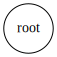

In [105]:
g4l.display.draw_tree(t.to_str(), size='400')
# the last iteration has length=1 

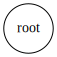

In [106]:
g4l.display.draw_tree(new_t.to_str(), size='40')
# the last iteration has length=1 

In [107]:
new_t.df

,depth,node_idx,depth_idx,parent_idx,node,freq,lps,transition_probs,transition_sum_log_probs,remove_node,active,num_child_nodes
0,1,0,0,None,0,44111,-62840.152905,"[0.23846659563374215, 0.29559520301058695, 0.3...",-9.367255,0,0,4.0
1,1,1,1,None,1,21830,-18794.382713,"[0.6933577645442052, 0.0, 0.20998625744388455,...",-8.296834,0,0,2.0
2,1,2,2,None,2,21830,-14715.435172,"[0.5972972972972973, 0.4027027027027027, 0.0, ...",-1.424897,0,0,4.0
3,1,3,3,None,3,7909,-6671.568838,"[0.6849159185737768, 0.0, 0.2073587052724744, ...",-9.670055,0,0,4.0
4,1,4,4,None,4,2070,-1324.994261,"[0.0, 0.0, 0.6613526570048309, 0.3381642512077...",-1.497692,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
745,4,745,590,148,0334,2,-1.386294,"[0.0, 0.0, 0.5, 0.5, 0.0]",-1.386294,0,0,NaN
746,4,746,591,148,1334,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0,NaN
747,4,747,592,148,2334,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0,NaN
748,4,748,593,148,3334,1,0.000000,"[0.0, 0.0, 1.0, 0.0, 0.0]",0.000000,0,0,NaN


In [7]:
results = df_results.sort_values(['num_nodes'], ascending=True)

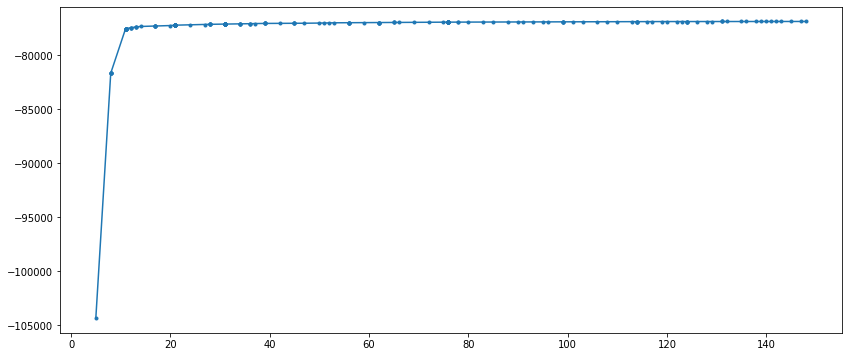

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(results.num_nodes, results.log_likelihood_sum, marker='.')
#plt.plot(results.num_nodes, results.log_likelihood_sum)
plt.show()

In [13]:
results.head(20).log_likelihood_sum

73   -104345.534132
72   -104326.191355
71   -104318.817097
70   -104316.473718
69   -104316.298275
68    -81613.457690
67    -81605.185646
66    -81602.995004
65    -81598.967519
64    -81586.266994
63    -81584.171151
62    -81584.039062
61    -81583.980217
60    -81583.778718
59    -81565.055132
58    -81563.211686
57    -81560.269845
56    -81560.215048
55    -81558.998421
54    -77414.703880
Name: log_likelihood_sum, dtype: float64

In [16]:
x = -104345.53413